## Objective:

To use TensorFlow to explore Convolutional Neural Network and to optimize a network for a complex visual classification task with a dataset of tiny (32x32) color images in 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. 

### Brief on Convolutional neural Network:

A convolution is a type of matrix operation, consisting of a kernel, a small matrix of weights, that slides over input data performing element-wise multiplication with the part of the input it is on, then summing the results into an output. 

Intuitively, a convolution allows for weight sharing - reducing the number of effective parameters - and image translation (allowing for the same feature to be detected in different parts of the input space). 

# Part 1

## 1st Implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

Load the data from the dataset provided from working directory instead of keras

In [ ]:
import os
import _pickle as cPickle
from keras import backend

def load_the_data(dirname,num_train_samples,training_batch,test_batch):
    x_train = np.empty((num_train_samples, 3, 32, 32), dtype="uint8")
    y_train = np.empty((num_train_samples,), dtype="uint8")

    for i in range(1, 6):
        fpath = os.path.join(dirname, training_batch + str(i))
        (
            x_train[(i - 1) * 10000 : i * 10000, :, :, :],
            y_train[(i - 1) * 10000 : i * 10000],
        ) = load_each_batch(fpath)

    fpath = os.path.join(dirname, test_batch)
    x_test, y_test = load_each_batch(fpath)

    y_train = np.reshape(y_train, (len(y_train), 1))
    y_test = np.reshape(y_test, (len(y_test), 1))

    if backend.image_data_format() == "channels_last":
        x_train = x_train.transpose(0, 2, 3, 1)
        x_test = x_test.transpose(0, 2, 3, 1)

    x_test = x_test.astype(x_train.dtype)
    y_test = y_test.astype(y_train.dtype)

    return (x_train, y_train), (x_test, y_test)

def load_each_batch(fpath, label_key="labels"):
    with open(fpath, "rb") as f:
        d = cPickle.load(f, encoding="bytes")
        # decode utf8
        d_decoded = {}
        for k, v in d.items():
            d_decoded[k.decode("utf8")] = v
        d = d_decoded
    data = d["data"]
    labels = d[label_key]

    data = data.reshape(data.shape[0], 3, 32, 32)
    return data, labels

In [ ]:
(train_X, train_Y), (test_X, test_Y) = load_the_data('cifar-10-batches-py',50000,'data_batch_','test_batch')


In [ ]:
# The image pixel values will transformed to values between 0 and 1 
#using normalization

train_X = train_X / 255
test_X = test_X / 255

In [ ]:
print('Test data shape:', test_X.shape)
print('Train data shape:', train_X.shape)
print('Test Label shape:', test_Y.shape)
print('Train Label shape:', train_Y.shape)

Test data shape: (10000, 32, 32, 3)
Train data shape: (50000, 32, 32, 3)
Test Label shape: (10000, 1)
Train Label shape: (50000, 1)


**Model Building**
- For this first implementation we are going to use 2 convolutional neural networks supported by max pooling layers and 3 hidden layers. 
Based on the shape of our training datasets, our model will have 32 nodes in the input layer. 
- We will use Relu activation function on the hidden layers and Softmax activation on the output layer.
- We will not use dropout in this model and our max pooling size is set to (3, 3) hoping to increase the models prediction and validation accuracy. 
- We are using **softmax** activation function since we have a multi-class classification problem, where the classes are mutually exclusive and the number of classes is already known in advance. 
- In addition to the **softmax** activation function, we will use another classification loss function - **Categorical Cross-Entropy** loss, combined with an **Adam** optimizer to accurately train the model to predict the correct class for each data point.
- The split between the training and validation data set at 80% / 20% and we run 15 iterations in this implementation.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), 
    layers.MaxPooling2D((3, 3)), 
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(), 
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation= 'softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)              

In [ ]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer='adam', loss= loss_function, metrics=['accuracy'])

In [ ]:
fitted_model = model.fit(train_X, train_Y, epochs= 15, validation_split= 0.2) 

Epoch 1/15
1250/1250 [==============================] - 49s 39ms/step - loss: 1.0034 - accuracy: 0.6463 - val_loss: 1.0667 - val_accuracy: 0.6315
Epoch 2/15
1250/1250 [==============================] - 42s 33ms/step - loss: 0.9565 - accuracy: 0.6642 - val_loss: 1.0242 - val_accuracy: 0.6430
Epoch 3/15
1250/1250 [==============================] - 43s 34ms/step - loss: 0.9162 - accuracy: 0.6818 - val_loss: 0.9977 - val_accuracy: 0.6584
Epoch 4/15
1250/1250 [==============================] - 42s 34ms/step - loss: 0.8815 - accuracy: 0.6914 - val_loss: 1.0218 - val_accuracy: 0.6500
Epoch 5/15
1250/1250 [==============================] - 44s 35ms/step - loss: 0.8485 - accuracy: 0.7041 - val_loss: 0.9709 - val_accuracy: 0.6666
Epoch 6/15
1250/1250 [==============================] - 42s 34ms/step - loss: 0.8116 - accuracy: 0.7151 - val_loss: 1.0193 - val_accuracy: 0.6539
Epoch 7/15
1250/1250 [==============================] - 42s 33ms/step - loss: 0.7925 - accuracy: 0.7207 - val_loss: 1.0020 -

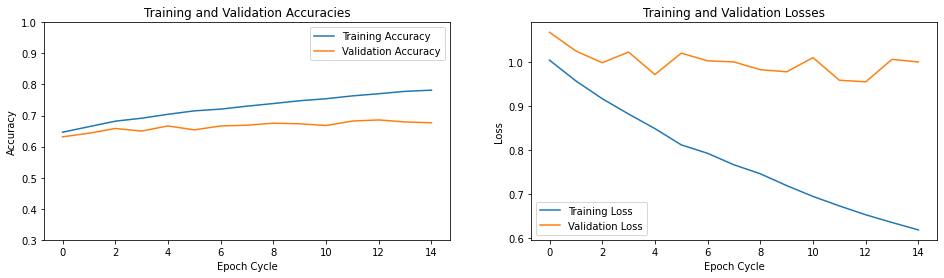

In [ ]:
fig = plt.figure(figsize=(16, 4))
fig.add_subplot(121)
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Training and Validation Accuracies')
plt.xlabel('Epoch Cycle')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])

fig.add_subplot(122)
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Training and Validation Losses')
plt.xlabel('Epoch Cycle')
plt.ylabel('Loss');

In [ ]:
predict = model.predict(test_X[:1, :, :])
print('Predict Shape:', predict.shape)
print('Prediction for 1st test image: digit', np.argmax(predict[0]))
train_loss, train_acc = model.evaluate(train_X, train_Y)
test_loss, test_acc = model.evaluate(test_X, test_Y)

print(f'\nclassification accuracy on training data: {train_acc*100:.2f}%')
print(f'classification accuracy on test data: {test_acc*100:.2f}%')
print(f'classification loss on training data: {train_loss:.3f}')
print(f'classification loss on test data: {test_loss:.3f}')

1/1 [==============================] - 0s 67ms/step
Predict Shape: (1, 10)
Prediction for 1st test image: digit 8
313/313 [==============================] - 3s 11ms/step - loss: 1.0001 - accuracy: 0.6724

classification accuracy on training data: 77.83%
classification accuracy on test data: 67.24%
classification loss on training data: 0.653
classification loss on test data: 1.000


**Model Output Analysis**
- After training the model over 15 iterations, we have achieved a classification accuracy of 77% on the training data and 67% on the test data.
- The training loss of 0.65 and testing loss of 1.0 is still a bit high and we will aim to acheive better accuracy and lower loss in subsequent implementations.
- From the training and testing accuracies and losses we believe that the model could still be improved on with the right model architecture. 

313/313 [==============================] - 3s 11ms/step


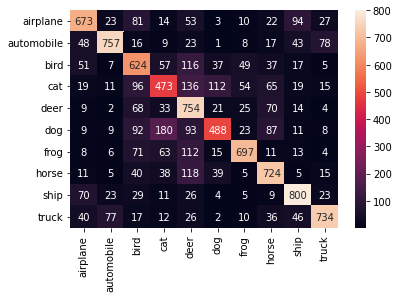

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

test_predict = model.predict(test_X)
test_predict_labels = np.argmax(test_predict, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels=test_Y, predictions=test_predict_labels)
#print('confusion matrix\n', confusion_matrix)
sb.heatmap(data= confusion_matrix, xticklabels= class_names, yticklabels= class_names, annot=True, fmt='g');

**Model Summary**
- The confusion matrix heatmap shows the model's prediction accuracies on each class with '**Ship**' the most accurately predicted class while '**Cat**' has the lowest accuracy.


1/1 [==============================] - 0s 70ms/step


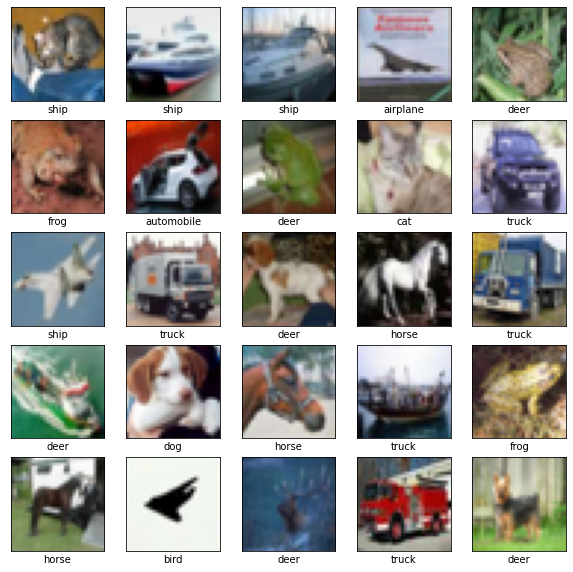

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
k = 1

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    predicted = model.predict(test_X[i:k, :, :])
    d = np.argmax(predicted[0])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    k+= 1
    plt.imshow(test_X[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_Y[test_Y == d][0]])
plt.show();

### Conclusion
- We further to show the actual predictions of the images according to their classes in the image classification above. The classification of the images clearly shows that our model classified most of the images correctly but some were clearly wrongly classied. 
- In subsequent implementations we will hope to acheive better results.

## 2nd Implementation



In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [ ]:
(train_X, train_Y), (test_X, test_Y) = load_the_data('cifar-10-batches-py',50000,'data_batch_','test_batch')


In [ ]:
# The image pixel values will transformed to values between 0 and 1 
#using normalization

train_X = train_X / 255
test_X = test_X / 255

In [ ]:
print('Test data shape:', test_X.shape)
print('Train data shape:', train_X.shape)
print('Test Label shape:', test_Y.shape)
print('Train Label shape:', train_Y.shape)

Test data shape: (10000, 32, 32, 3)
Train data shape: (50000, 32, 32, 3)
Test Label shape: (10000, 1)
Train Label shape: (50000, 1)


**Model Building**
- For this second implementation we are going to use 3 convolutional neural networks supported by just 2 max pooling layers and 4 hidden layers. 
Based on the shape of our training datasets, our model will have 32 nodes in the input layer. 
- We will use **Relu** activation function on both the hidden layers and the output layer.
- We will not use dropout in this model and our max pooling size is set to (2, 2) hoping to increase the models prediction and validation accuracy. 

- In this model we will use a different classification loss function - **Sparse Categorical Cross-Entropy** loss, combined with an **Adam** optimizer to accurately train the model to predict the correct class for each data point.
- The split between the training and validation data set at 70% / 30% and we run 15 iterations in this implementation.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), 
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'), layers.Flatten(), 
    layers.Dense(64, activation='relu'), layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam', loss= loss_function, metrics=['accuracy'])

In [ ]:
fitted_model = model.fit(train_X, train_Y, epochs= 10, validation_split= 0.3) 

Epoch 1/10
1094/1094 [==============================] - 73s 66ms/step - loss: 1.6758 - accuracy: 0.3826 - val_loss: 1.4098 - val_accuracy: 0.4845
Epoch 2/10
1094/1094 [==============================] - 67s 61ms/step - loss: 1.2842 - accuracy: 0.5400 - val_loss: 1.2708 - val_accuracy: 0.5525
Epoch 3/10
1094/1094 [==============================] - 67s 61ms/step - loss: 1.1263 - accuracy: 0.5997 - val_loss: 1.1654 - val_accuracy: 0.5949
Epoch 4/10
1094/1094 [==============================] - 67s 62ms/step - loss: 1.0230 - accuracy: 0.6412 - val_loss: 1.0222 - val_accuracy: 0.6425
Epoch 5/10
1094/1094 [==============================] - 68s 62ms/step - loss: 0.9415 - accuracy: 0.6674 - val_loss: 1.0105 - val_accuracy: 0.6509
Epoch 6/10
1094/1094 [==============================] - 67s 61ms/step - loss: 0.8807 - accuracy: 0.6904 - val_loss: 0.9523 - val_accuracy: 0.6648
Epoch 7/10
1094/1094 [==============================] - 70s 64ms/step - loss: 0.8242 - accuracy: 0.7119 - val_loss: 0.9666 -

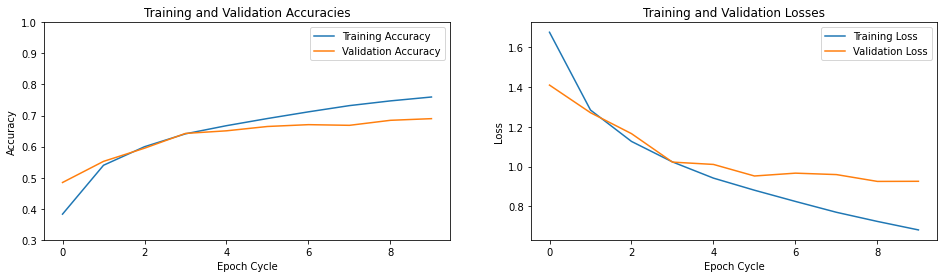

In [ ]:
fig = plt.figure(figsize=(16, 4))
fig.add_subplot(121)
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Training and Validation Accuracies')
plt.xlabel('Epoch Cycle')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])

fig.add_subplot(122)
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Training and Validation Losses')
plt.xlabel('Epoch Cycle')
plt.ylabel('Loss');

In [ ]:
predict = model.predict(test_X[:1, :, :])
print('Predict Shape:', predict.shape)
print('Prediction for 1st test image: digit', np.argmax(predict[0]))
train_loss, train_acc = model.evaluate(train_X, train_Y)
test_loss, test_acc = model.evaluate(test_X, test_Y)

print(f'\nclassification accuracy on training data: {train_acc*100:.2f}%')
print(f'classification accuracy on test data: {test_acc*100:.2f}%')
print(f'classification loss on training data: {train_loss:.3f}')
print(f'classification loss on test data: {test_loss:.3f}')

1/1 [==============================] - 0s 21ms/step
Predict Shape: (1, 10)
Prediction for 1st test image: digit 3
313/313 [==============================] - 6s 18ms/step - loss: 0.9222 - accuracy: 0.6873

classification accuracy on training data: 76.44%
classification accuracy on test data: 68.73%
classification loss on training data: 0.686
classification loss on test data: 0.922


**Model Output Analysis**
- This model was trained over 10 iterations, and we have achieved a classification accuracy of 76% on the training data and 68% on the test data which is almost similar to the first model accuracy metrics.
- The training loss of 0.68 and testing loss of 0.92 though still seems to be a slight but negligible improvement on the previous model.
- From the training and testing accuracies and losses we believe that the model could still be improved on with an improved model architecture. 

313/313 [==============================] - 8s 26ms/step


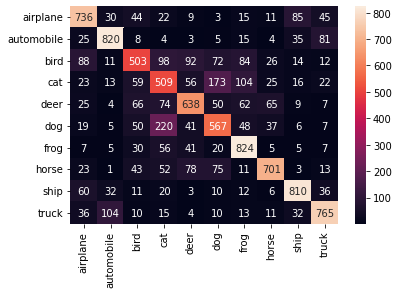

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

test_predict = model.predict(test_X)
test_predict_labels = np.argmax(test_predict, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels=test_Y, predictions=test_predict_labels)
#print('confusion matrix\n', confusion_matrix)
sb.heatmap(data= confusion_matrix, xticklabels= class_names, yticklabels= class_names, annot=True, fmt='g');

**Model Summary**
- The confusion matrix heatmap shows the model's prediction accuracies on each class with '**Automobile**' the most accurately predicted class while '**Bird**' has the lowest accuracy.

1/1 [==============================] - 0s 26ms/step


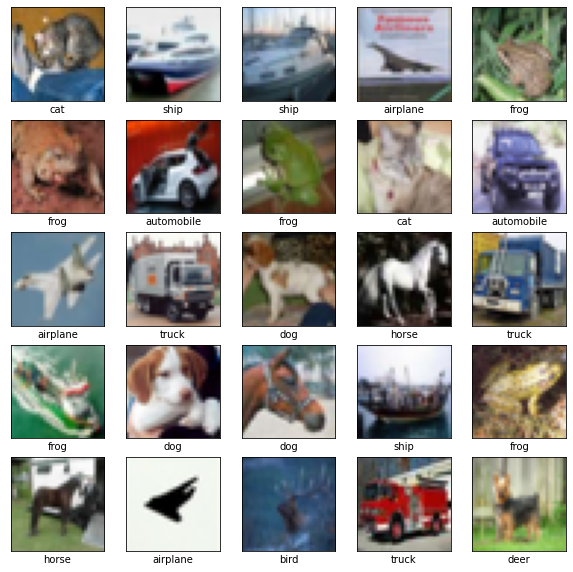

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
k = 1

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    predicted = model.predict(test_X[i:k, :, :])
    d = np.argmax(predicted[0])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    k+= 1
    plt.imshow(test_X[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_Y[test_Y == d][0]])
plt.show();

### Conclusion
- Above we show the actual predictions of the images according to their classes in the image classification above. The classification of the images clearly shows that our model classified most of the images correctly but some were clearly wrongly classied. 
- In subsequent implementations we will hope to acheive better results.

## 3rd Implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [ ]:
(train_X, train_Y), (test_X, test_Y) = load_the_data('cifar-10-batches-py',50000,'data_batch_','test_batch')


In [ ]:
# The image pixel values will transformed to values between 0 and 1 
#using normalization

train_X = train_X / 255
test_X = test_X / 255

In [ ]:
print('Test data shape:', test_X.shape)
print('Train data shape:', train_X.shape)
print('Test Label shape:', test_Y.shape)
print('Train Label shape:', train_Y.shape)

Test data shape: (10000, 32, 32, 3)
Train data shape: (50000, 32, 32, 3)
Test Label shape: (10000, 1)
Train Label shape: (50000, 1)


**Model Building**
- In this model we will use a 3 convolutional neural networks supported by max pooling layers and 5 hidden layers. We will use **Relu** activation function on the hidden layers and **Softmax** activation on the output layer. This model also uses dropout of 30% after each hidden layer and a dropout of 50% before the output layer.
- This is the first implementation wehere we are using dropout and our pooling size is set to (2, 2) hoping to increase the models prediction and validation accuracy. 
- We are using **softmax** activation function since we have a multi-class classification problem, where the classes are mutually exclusive and the number of classes is already known in advance. This is in view of the performance of the previous model where we used **Relu** at the **output** layer.
- In addition to the **softmax** activation function, we will still use the - **Sparse Categorical Cross-Entropy** loss function, combined with an **Adam** optimizer to accurately train the model to predict the correct class for each data point.

In [ ]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3), 
    layers.Flatten(), 
    layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    layers.Dense(10, activation= 'softmax')
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                    

In [ ]:

loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer= opt, loss= loss_function, metrics=['accuracy'])


In [ ]:
fitted_model = model.fit(train_X, train_Y, epochs= 10, validation_split= 0.3) 

Epoch 1/10
1094/1094 [==============================] - 196s 178ms/step - loss: 1.6279 - accuracy: 0.3998 - val_loss: 1.3394 - val_accuracy: 0.5163
Epoch 2/10
1094/1094 [==============================] - 194s 177ms/step - loss: 1.2345 - accuracy: 0.5610 - val_loss: 1.0702 - val_accuracy: 0.6217
Epoch 3/10
1094/1094 [==============================] - 193s 176ms/step - loss: 1.0766 - accuracy: 0.6226 - val_loss: 0.9603 - val_accuracy: 0.6750
Epoch 4/10
1094/1094 [==============================] - 194s 177ms/step - loss: 0.9747 - accuracy: 0.6591 - val_loss: 0.8887 - val_accuracy: 0.6877
Epoch 5/10
1094/1094 [==============================] - 198s 181ms/step - loss: 0.8967 - accuracy: 0.6892 - val_loss: 0.8974 - val_accuracy: 0.6871
Epoch 6/10
1094/1094 [==============================] - 193s 176ms/step - loss: 0.8462 - accuracy: 0.7025 - val_loss: 0.8340 - val_accuracy: 0.7115
Epoch 7/10
1094/1094 [==============================] - 193s 177ms/step - loss: 0.7998 - accuracy: 0.7203 - val_

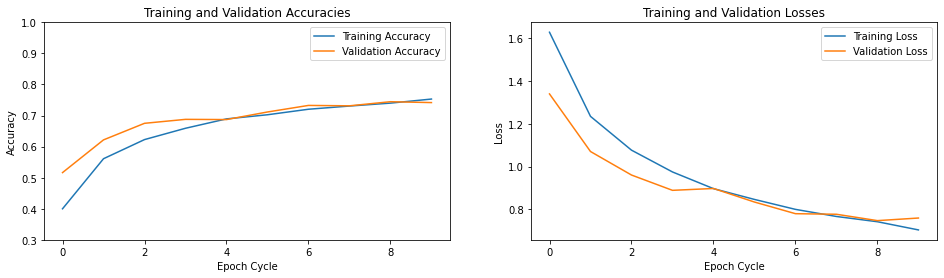

In [ ]:
fig = plt.figure(figsize=(16, 4))
fig.add_subplot(121)
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Training and Validation Accuracies')
plt.xlabel('Epoch Cycle')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])

fig.add_subplot(122)
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Training and Validation Losses')
plt.xlabel('Epoch Cycle')
plt.ylabel('Loss');

In [ ]:
predict = model.predict(test_X[:1, :, :])
#print('Predict Shape:', predict.shape)
#print('Prediction for 1st test image: digit', np.argmax(predict[0]))
train_loss, train_acc = model.evaluate(train_X, train_Y)
test_loss, test_acc = model.evaluate(test_X, test_Y)

print(f'\nclassification accuracy on training data: {train_acc*100:.2f}%')
print(f'classification accuracy on test data: {test_acc*100:.2f}%')
print(f'classification loss on training data: {train_loss:.3f}')
print(f'classification loss on test data: {test_loss:.3f}')

313/313 [==============================] - 12s 39ms/step - loss: 0.7654 - accuracy: 0.7362

classification accuracy on training data: 81.91%
classification accuracy on test data: 73.62%
classification loss on training data: 0.539
classification loss on test data: 0.765


**Model Output Analysis**
- This model is also trained over 10 iterations and we have achieved a higher classification accuracy of 81% on the training data and 73% on the test data.
- The training loss also improved to 0.58 and testing loss of 0.76 which is a significant improvement form the last model implementation.


313/313 [==============================] - 16s 50ms/step


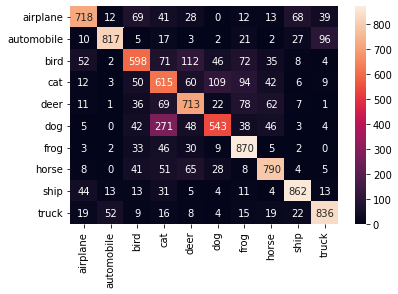

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

test_predict = model.predict(test_X)
test_predict_labels = np.argmax(test_predict, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels=test_Y, predictions=test_predict_labels)
#print('confusion matrix\n', confusion_matrix)
sb.heatmap(data= confusion_matrix, xticklabels= class_names, yticklabels= class_names, annot=True, fmt='g');

**Model Summary**
- The confusion matrix heatmap shows the model's prediction accuracies on each class with '**Frog**' the most accurately predicted class while '**Dog**' has the lowest accuracy.

1/1 [==============================] - 0s 33ms/step


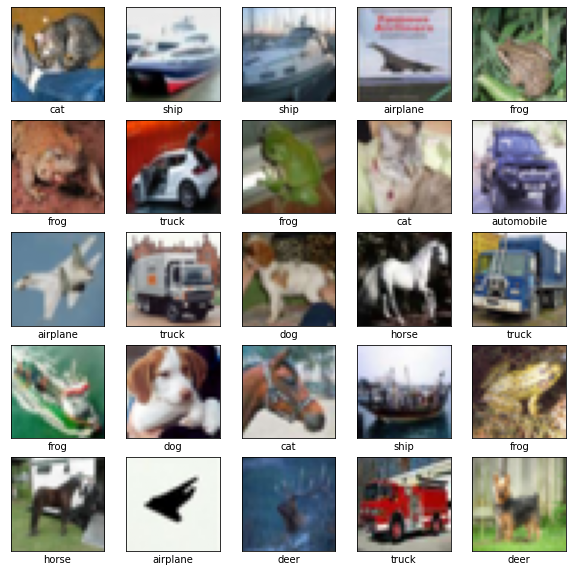

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
k = 1

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    predicted = model.predict(test_X[i:k, :, :])
    d = np.argmax(predicted[0])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    k+= 1
    plt.imshow(test_X[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_Y[test_Y == d][0]])
plt.show();

### Conclusion
- We further to show the actual predictions of the images according to their classes in the image classification above. The classification isslightly improved though there are still some notable wrongly classifications. 
- In subsequent implementations we will try to improve the model further to acheive better results.

## 4th Implementation

In [ ]:
#Import Libraries relevant to the project

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [ ]:
# Import the data set and split into the training and testing data sets

(train_X, train_Y), (test_X, test_Y) = load_the_data('cifar-10-batches-py',50000,'data_batch_','test_batch')


In [ ]:
# The image pixel values will transformed to values between 0 and 1 
#using normalization

train_X = train_X / 255
test_X = test_X / 255

In [ ]:
#Confirm the shape of the training and test data

print('Test data shape:', test_X.shape)
print('Train data shape:', train_X.shape)
print('Test Label shape:', test_Y.shape)
print('Train Label shape:', train_Y.shape)

Test data shape: (10000, 32, 32, 3)
Train data shape: (50000, 32, 32, 3)
Test Label shape: (10000, 1)
Train Label shape: (50000, 1)


**Model Building**
- For this model, we are going to use 4 convolutional neural networks supported by max pooling layers and 6 hidden layers. We will use Relu activation function on the hidden layers and **Softmax** activation on the output layer. This model also uses **dropout** of 25% after each layer.
- We have added drop out to the model and our max pooling size is set to (2, 2) hoping to increase the models prediction and validation accuracy. 
- We continue using the **softmax** activation function since we have a multi-class classification problem, where the classes are mutually exclusive and the number of classes is already known in advance. 
- In addition to the **softmax** activation function, continue with our classification loss function - **Sparse Categorical Cross-Entropy** loss, combined with an **Adam** optimizer to accurately train the model to predict the correct class for each data point. This is based on the result of the last model which we are hoping to improve on.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation = 'relu'), 
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25), 
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25), 
    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  
    layers.Flatten(), 
    layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.25),  
    layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),  
    layers.Dense(10, activation= 'softmax')
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_55 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_48 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_56 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                

In [ ]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer='adam', loss= loss_function, metrics=['accuracy'])

In [ ]:
#fit model and run 30 epochs with a validation split of 30%
fitted_model = model.fit(train_X, train_Y, epochs= 30, validation_split= 0.3) 

Epoch 1/30
1094/1094 [==============================] - 202s 184ms/step - loss: 1.7443 - accuracy: 0.3476 - val_loss: 1.4268 - val_accuracy: 0.4736
Epoch 2/30
1094/1094 [==============================] - 199s 182ms/step - loss: 1.3261 - accuracy: 0.5198 - val_loss: 1.1790 - val_accuracy: 0.5823
Epoch 3/30
1094/1094 [==============================] - 202s 184ms/step - loss: 1.1717 - accuracy: 0.5830 - val_loss: 1.0278 - val_accuracy: 0.6349
Epoch 4/30
1094/1094 [==============================] - 202s 185ms/step - loss: 1.0796 - accuracy: 0.6157 - val_loss: 0.9856 - val_accuracy: 0.6573
Epoch 5/30
1094/1094 [==============================] - 203s 186ms/step - loss: 0.9961 - accuracy: 0.6505 - val_loss: 0.9362 - val_accuracy: 0.6711
Epoch 6/30
1094/1094 [==============================] - 201s 184ms/step - loss: 0.9457 - accuracy: 0.6660 - val_loss: 0.8827 - val_accuracy: 0.6889
Epoch 7/30
1094/1094 [==============================] - 200s 183ms/step - loss: 0.9104 - accuracy: 0.6791 - val_

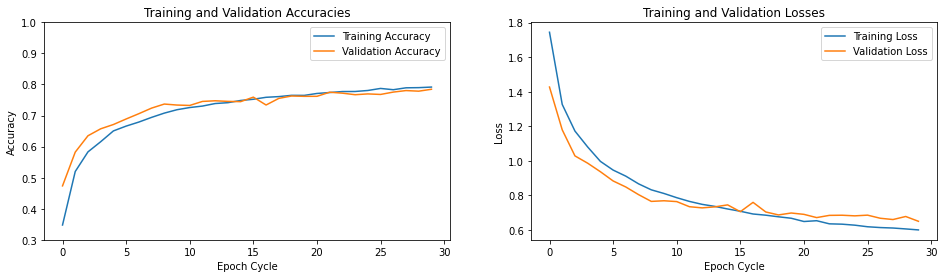

In [ ]:
fig = plt.figure(figsize=(16, 4))
fig.add_subplot(121)
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Training and Validation Accuracies')
plt.xlabel('Epoch Cycle')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])

fig.add_subplot(122)
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Training and Validation Losses')
plt.xlabel('Epoch Cycle')
plt.ylabel('Loss');

In [ ]:
predict = model.predict(test_X[:1, :, :])
print('Predict Shape:', predict.shape)
print('Prediction for 1st test image: digit', np.argmax(predict[0]))
train_loss, train_acc = model.evaluate(train_X, train_Y)
test_loss, test_acc = model.evaluate(test_X, test_Y)

print(f'\nclassification accuracy on training data: {train_acc*100:.2f}%')
print(f'classification accuracy on test data: {test_acc*100:.2f}%')
print(f'classification loss on training data: {train_loss:.3f}')
print(f'classification loss on test data: {test_loss:.3f}')

1/1 [==============================] - 0s 134ms/step
Predict Shape: (1, 10)
Prediction for 1st test image: digit 3
313/313 [==============================] - 15s 47ms/step - loss: 0.6620 - accuracy: 0.7793

classification accuracy on training data: 85.58%
classification accuracy on test data: 77.93%
classification loss on training data: 0.436
classification loss on test data: 0.662


**Model Output Analysis**
- After training the model over 30 iterations, we have achieved a classification accuracy of 85% on the training data and 77.9% on the test data.
- The training loss of 0.436 and the testing loss of 0.662 is also significantly lower than that of the previous model. The accuracy and loss curves also shows that the training and validation both converged. 
- From the training and testing accuracies and losses we can see that the model is not overfitting and even though the accuracy on the test data stands at 77.9% we believe that it could still be improved on with the right model architecture. 

313/313 [==============================] - 13s 40ms/step


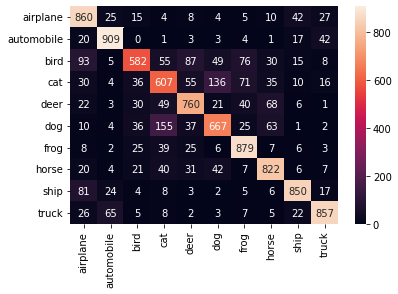

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

test_predict = model.predict(test_X)
test_predict_labels = np.argmax(test_predict, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels=test_Y, predictions=test_predict_labels)
#print('confusion matrix\n', confusion_matrix)
sb.heatmap(data= confusion_matrix, xticklabels= class_names, yticklabels= class_names, annot=True, fmt='g');

**Model Summary**
- The confusion matrix heatmap shows the model's prediction accuracies on each class with '**Automobile**' the most accurately predicted class while '**bird**' has the lowest accuracy.


1/1 [==============================] - 0s 28ms/step


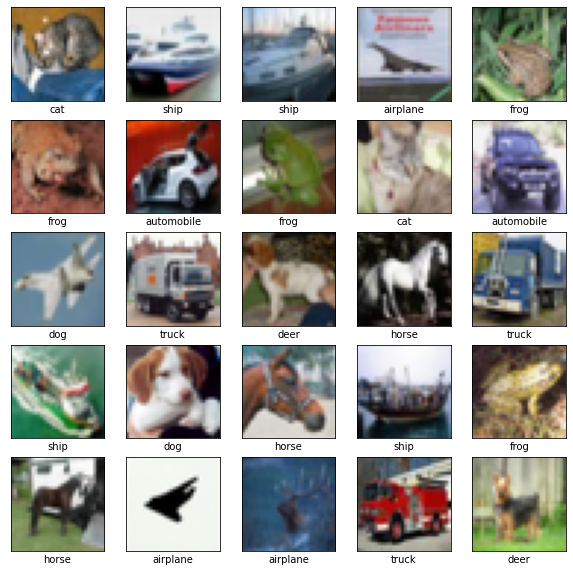

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
k = 1

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    predicted = model.predict(test_X[i:k, :, :])
    d = np.argmax(predicted[0])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    k+= 1
    plt.imshow(test_X[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_Y[test_Y == d][0]])
plt.show();

**Conclusion**
- Above we show the actual predictions of the images according to their classes in the classification below. The classification of the images clearly shows that our model classified most of the images correctly but some were clearly wrongly classied such as Dog classified as a Deer and a Deer classified as an airplane.
- All instances of Automobiles and trucks which had high classification accuracies as seen in the confusion matrix were all accurately classified while those with lower values form the confusion matrix were mostly wrongly classified.

## 5th Implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [ ]:
(train_X, train_Y), (test_X, test_Y) = load_the_data('cifar-10-batches-py',50000,'data_batch_','test_batch')


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# The image pixel values will transformed to values between 0 and 1 
#using normalization

train_X = train_X / 255
test_X = test_X / 255

In [ ]:
print('Test data shape:', test_X.shape)
print('Train data shape:', train_X.shape)
print('Test Label shape:', test_Y.shape)
print('Train Label shape:', train_Y.shape)

Test data shape: (10000, 32, 32, 3)
Train data shape: (50000, 32, 32, 3)
Test Label shape: (10000, 1)
Train Label shape: (50000, 1)


**Model Building**
- In this final model, we continue 4 convolutional neural networks supported by max pooling layers and 6 hidden layers. We also use the Relu activation function on the hidden layers and **Softmax** activation on the output layer. This model also uses **dropout** of 25% after each layer however we have reduced the **dropout percentatage to 20% at the output layer**. We maintain our max pooling size of (2, 2) hoping to increase the models prediction and validation accuracy further. 
- We continue using the **softmax** activation function since we have a multi-class classification problem, where the classes are mutually exclusive and the number of classes is already known in advance. 
- In addition to the **softmax** activation function, continue with our classification loss function - **Sparse Categorical Cross-Entropy** loss, combined with an **Adam** optimizer to accurately train the model to predict the correct class for each data point. This is based on the result of the last model which we are hoping to improve on.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation = 'relu'), 
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25), 
    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25), 
    layers.Conv2D(256, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  
    layers.Flatten(), 
    layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.25),  
    layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),  
    layers.Dense(10, activation= 'softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                  

In [ ]:
#loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer= 'adam', loss= loss_function, metrics=['accuracy'])

In [ ]:
fitted_model = model.fit(train_X, train_Y, epochs= 50, validation_split= 0.3) 

Epoch 1/50
1094/1094 [==============================] - 231s 211ms/step - loss: 1.6920 - accuracy: 0.3673 - val_loss: 1.3457 - val_accuracy: 0.5085
Epoch 2/50
1094/1094 [==============================] - 229s 209ms/step - loss: 1.2550 - accuracy: 0.5477 - val_loss: 1.0921 - val_accuracy: 0.6041
Epoch 3/50
1094/1094 [==============================] - 229s 209ms/step - loss: 1.0637 - accuracy: 0.6233 - val_loss: 0.9275 - val_accuracy: 0.6823
Epoch 4/50
1094/1094 [==============================] - 227s 207ms/step - loss: 0.9485 - accuracy: 0.6676 - val_loss: 0.8864 - val_accuracy: 0.6923
Epoch 5/50
1094/1094 [==============================] - 227s 208ms/step - loss: 0.8761 - accuracy: 0.6928 - val_loss: 0.8267 - val_accuracy: 0.7129
Epoch 6/50
1094/1094 [==============================] - 228s 208ms/step - loss: 0.8198 - accuracy: 0.7111 - val_loss: 0.7773 - val_accuracy: 0.7282
Epoch 7/50
1094/1094 [==============================] - 226s 206ms/step - loss: 0.7788 - accuracy: 0.7261 - val_

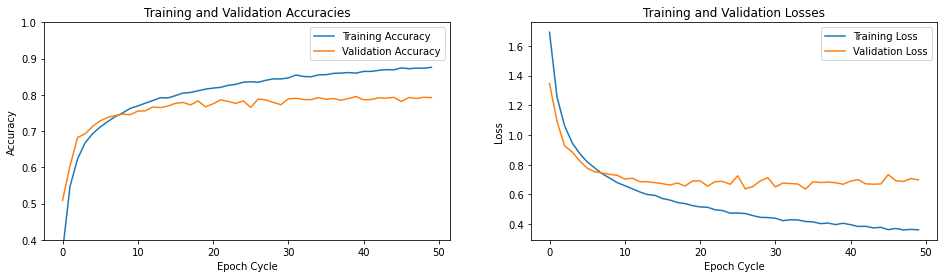

In [ ]:
fig = plt.figure(figsize=(16, 4))
fig.add_subplot(121)
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Training and Validation Accuracies')
plt.xlabel('Epoch Cycle')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1.0])

fig.add_subplot(122)
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Training and Validation Losses')
plt.xlabel('Epoch Cycle')
plt.ylabel('Loss');

# Part 2

Computed error on the test set from this implementation as it is the best performing model from our exploration

In [ ]:
predict = model.predict(test_X[:1, :, :])
print('Predict Shape:', predict.shape)
print('Prediction for 1st test image: digit', np.argmax(predict[0]))
train_loss, train_acc = model.evaluate(train_X, train_Y)
test_loss, test_acc = model.evaluate(test_X, test_Y)

print(f'\nclassification accuracy on training data: {train_acc*100:.2f}%')
print(f'classification accuracy on test data: {test_acc*100:.2f}%')
print(f'classification loss on training data: {train_loss:.3f}')
print(f'classification loss on test data: {test_loss:.3f}')

1/1 [==============================] - 0s 147ms/step
Predict Shape: (1, 10)
Prediction for 1st test image: digit 3
313/313 [==============================] - 13s 41ms/step - loss: 0.6954 - accuracy: 0.7878

classification accuracy on training data: 91.44%
classification accuracy on test data: 78.78%
classification loss on training data: 0.291
classification loss on test data: 0.695


**Model Output Analysis**
- For the model we have increased the number of epochs 50 iterations and we have achieved a classification accuracy of 91% on the training data and 78.78% on the test data which is an improvement on the last model.
- The training loss also reduced to 0.291 and the testing loss of 0.695 is also slightly better than that of the previous model.  
- So far this model has performed better than all other model implementations.
 

313/313 [==============================] - 18s 58ms/step


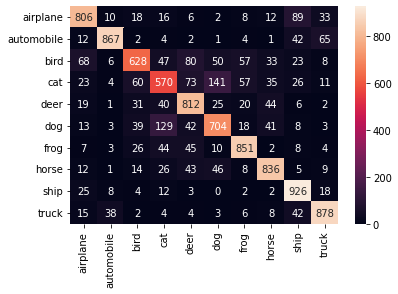

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

test_predict = model.predict(test_X)
test_predict_labels = np.argmax(test_predict, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels=test_Y, predictions=test_predict_labels)
#print('confusion matrix\n', confusion_matrix)
sb.heatmap(data= confusion_matrix, xticklabels= class_names, yticklabels= class_names, annot=True, fmt='g');

**Model Summary**
- The confusion matrix heatmap shows the model's prediction accuracies on each class with '**Ship**' the most accurately predicted class while '**Cat**' has the lowest accuracy.

1/1 [==============================] - 0s 35ms/step


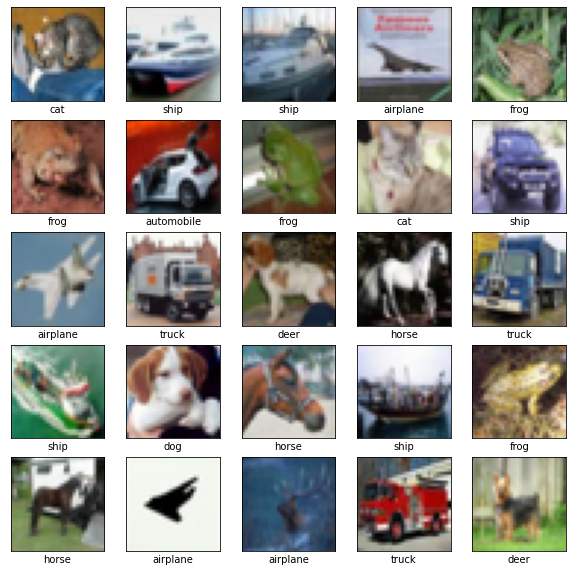

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
k = 1

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    predicted = model.predict(test_X[i:k, :, :])
    d = np.argmax(predicted[0])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    k+= 1
    plt.imshow(test_X[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_Y[test_Y == d][0]])
plt.show();

**Conclusion**
- Above we show the actual predictions of the images according to their classes in the classification below. The classification of the images clearly shows that our model classified most of the images correctly with just 4 wrong predictions out of 25 samples.
- In the future we will try to improve on this model is it is still possible to achieve better results than what we have currently.

# <b>Bonus<br></b>


we have run images from the 80 million dataset on our trained model from various other classes other than the 10 classes.<br>
Model used - 5th architecture.

Used 10240 images from 80 million dataset to show rejection precentage with trained model.<br>

The script initially takes an input to select the folder and iterates through 160 jpg files (i.e.,) 10240 images.It takes each jpg file and splits the stacked image to 64 individual images of 32* 32  and passes to the model for predicting. Then,prediction output is validated using SparseCategoricalCrossentropy. <b>By setting the entrophy threshold to 1. The predictions less than the score of 1 is rejected.

<b>setting verbose to 0 to avoid the logs of model.predict()

In [ ]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import load_img, img_to_array,array_to_img
from keras.applications.vgg16 import preprocess_input
import numpy as np

accepted = 0
rejected = 0
total = 0

folder_name = input("Input a folder name from Tiny Images")
for i in range(0,160):
  img = load_img('TinyImages/'+folder_name+'/img_'+str(i)+'.jpg')
  x = img_to_array(img)
  for i in range(1,65):
    eachimage = x[(32*i)-32:32*i]/255
    predicted = model.predict(eachimage.reshape(1,32,32,3),verbose = 0)
    d = np.argmax(predicted[0])
    #
    y_true = np.array(d)
    y_pred = predicted[0]
    scce = tf.keras.losses.SparseCategoricalCrossentropy(reduction=tf.keras.losses.Reduction.SUM)
    total += 1 
    if(scce(y_true, y_pred).numpy() > 1 ):
      accepted +=1
    else:
      rejected +=1
    

print(f"percentage (%) of out-of-class examples you have correctly rejected {(rejected/total)*100}%")

Input a folder name from Tiny Imagesimages_0
percentage (%) of out-of-class examples you have correctly rejected 79.27734375%


79% of the total other class images have been rejected by setting a threshold of 1.

Total images tested = 10240

Now , we pass the in class images from our test set , with <b>the same entrophy threshold 1</b>  and calculate the percentage (%) of in-class examples (from the test set) that is erroneously rejected.

In [ ]:
accepted = 0
rejected = 0
total = 0

for i in range(0,10000):
    eachimage = test_X[i,:,:,]
    predicted = model.predict(eachimage.reshape(1,32,32,3),verbose = 0)
    d = np.argmax(predicted[0])
    
    y_true = np.array(d)
    y_pred = predicted[0]
    scce = tf.keras.losses.SparseCategoricalCrossentropy(reduction=tf.keras.losses.Reduction.SUM)
    total += 1 
    if(scce(y_true, y_pred).numpy() > 1 ):
      accepted +=1
    else:
      rejected +=1
    
print(f"percentage (%) of in-class examples (from the test set) that you erroneously rejected {(rejected/total)*100}%")

percentage (%) of in-class examples (from the test set) that you erroneously rejected 94.0%


A total of 94% of the inclass images have been erroneously rejected with a threshold of 1, it shows that threshold has to be lowered and set anywhere between 0.8 and 1 to balance out the erronous rejection. also other loss reduction options can be tried to find an optimal way.

Present objects from an untrained class<br>

Below are the 64 images from img_0.jpg in folder images_0 for viewing

Input a folder name from Tiny Imagesimages_0


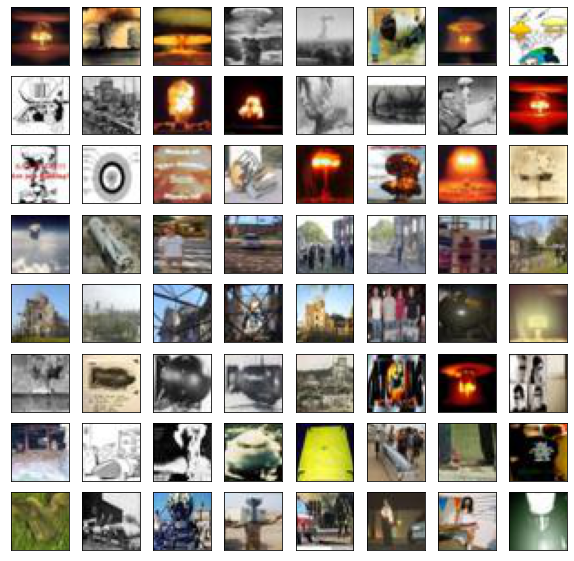

In [ ]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import load_img, img_to_array,array_to_img
from keras.applications.vgg16 import preprocess_input
import numpy as np

folder_name = input("Input a folder name from Tiny Images")
for i in range(0,1):
  img = load_img('TinyImages/'+folder_name+'/img_'+str(i)+'.jpg')
  x = (img_to_array(img))/255
  plt.figure(figsize=(10,10))
  for i in range(1,65):
    eachimage = x[(32*i)-32:32*i]
    plt.subplot(8,8,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(eachimage)
  plt.show()
  break